# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

### Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

### Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?

### Data Description

The data contains information regarding the interaction of users in both groups with the two versions of the the ENews Express landing page. The detailed data dictionary is given below.

### Data Dictionary

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

**Coded by**:
*Joseph Anyanwu*

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.26.2 pandas==2.1.3 matplotlib==3.8.2 seaborn==0.13.0 scipy==1.11.4 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# defining the location where the data is stored
file_path = 'C:/Users/josep/Downloads/abtest.csv'

In [3]:
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Reading the Data into a DataFrame

In [5]:
df = pd.read_csv(file_path)

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [7]:
#Viewing the first five rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
#Viewing the last five rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
# check for datatypes of columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
# to get the number of rows and columns respectively in a tuple
print(f"The data has {df.shape[0]} rows and {df.shape[1]} columns.")

The data has 100 rows and 6 columns.


In [ ]:
# Getting the statistical summary for the variables
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [ ]:
# checking for missing values
missing_values_count = df.isnull().sum()
print(missing_values_count)
print('--'*50)
if missing_values_count.sum() == 0:
  print("There are no missing values in the data.")
else:
  print("There are missing values in the data.")


user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64
----------------------------------------------------------------------------------------------------
There are no missing values in the data.


In [ ]:
# Check for duplicates
duplicates = df.duplicated()
if duplicates.sum() == 0:
  print("There are no duplicates in the data.")
else:
  print("There are duplicates in the data.")

There are no duplicates in the data.


### Univariate Analysis

In [10]:
# creating subsets of the data for analysis based on the group column
controls = df[df['group'] == 'control'].drop('group', axis=1).reset_index(drop=True)
treatments = df[df['group'] == 'treatment'].drop('group', axis=1).reset_index(drop=True)

In [ ]:
# Confirming the columns and rows of the Treatments dataframe
print(treatments.head())
print('--'*50)
print(treatments.shape)

   user_id landing_page  time_spent_on_the_page converted language_preferred
0   546468          new                    7.13       yes            English
1   546462          new                    4.40        no            Spanish
2   546459          new                    4.75       yes            Spanish
3   546448          new                    5.25       yes             French
4   546461          new                   10.71       yes             French
----------------------------------------------------------------------------------------------------
(50, 5)


In [ ]:
# Confirming the columns and rows of the Controls dataframe
print(controls.head())
print('--'*50)
print(controls.shape)

   user_id landing_page  time_spent_on_the_page converted language_preferred
0   546592          old                    3.48        no            Spanish
1   546567          old                    3.02        no             French
2   546558          old                    5.28       yes            English
3   546581          old                    6.53       yes            Spanish
4   546548          old                    2.08        no            English
----------------------------------------------------------------------------------------------------
(50, 5)


Both the controls and treatment have equal number of rows and columns at 50 and 5 respectively

**Plots of time spent on page**


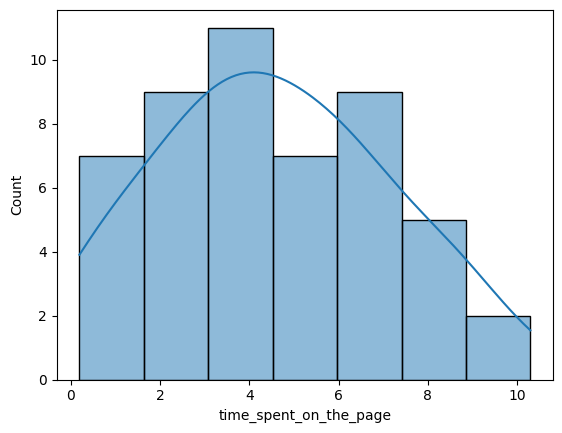

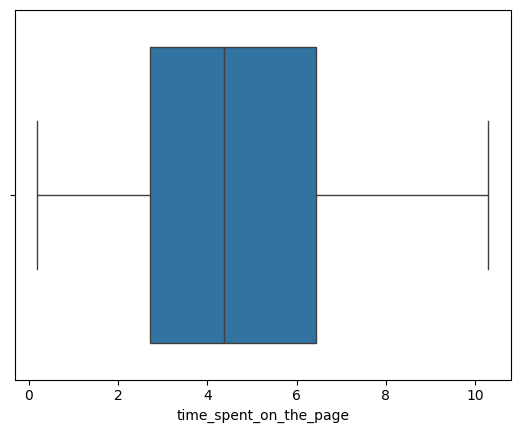

In [ ]:
sns.histplot(data = controls,x = 'time_spent_on_the_page' , kde=True)
plt.show();
sns.boxplot(data = controls,x = 'time_spent_on_the_page')
plt.show();


*   50% of the time spent on the old page lies between 2.5 and 6.5 minutes.
*   time spent on the old page seem symmetrical indicating a normal distribution
*   time spent on the old page does not have any significant outliers.
*   The average time spent on the Control page is: 4.53

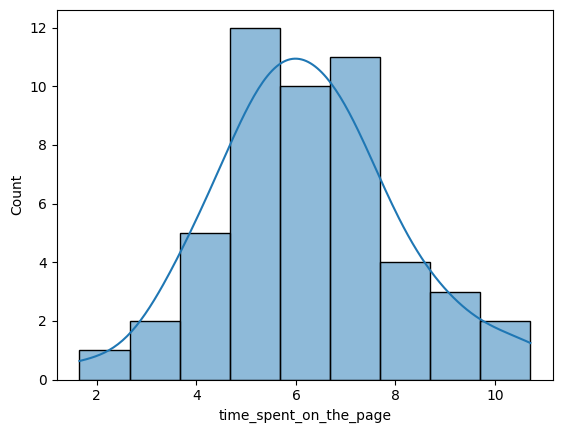

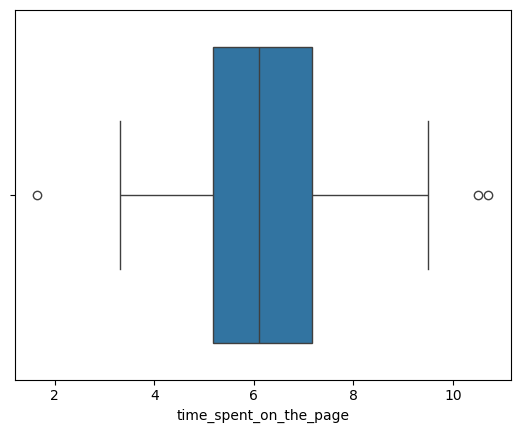

In [ ]:
sns.histplot(data = treatments,x = 'time_spent_on_the_page' , kde=True)
plt.show();
sns.boxplot(data = treatments,x = 'time_spent_on_the_page')
plt.show();

*   50% of the time spent on the new page lies between 5 and 7.
*   time spent on the new page seem symmetrical indicating a normal distribution
*   time spent on the new page have some outliers showing some folks spent more than the average amount of time.
*   The average time spent on the Treatment page is: 6.22

**Plot of Converted**

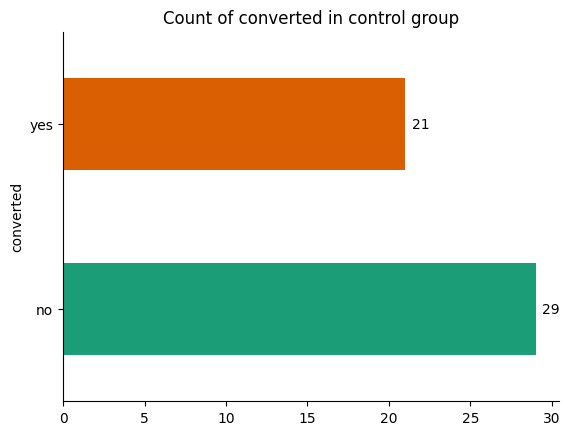

----------------------------------------------------------------------------------------------------


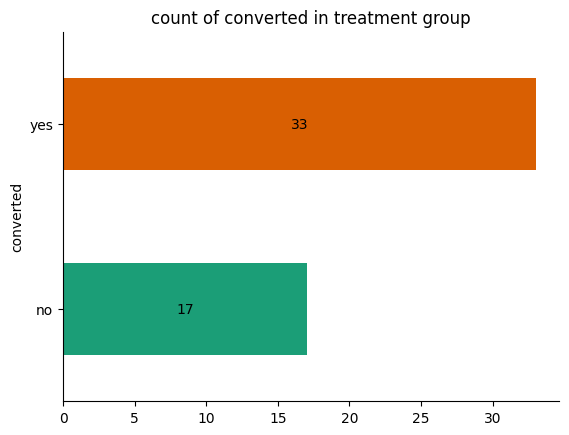

In [ ]:
# store the control plot in a variable.
ctcv = controls.groupby('converted').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Adds labels with integer formatting slightly away from the bars.
for container in ctcv.containers:
    ctcv.bar_label(container, fmt='%d', label_type='edge', padding=5)

plt.title('Count of converted in control group')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show();

print('--'*50)

# stores the treatment plot in a variable.
ttcv = treatments.groupby('converted').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Adds labels with integer formatting in the center of the bars.
for container in ttcv.containers:
    ttcv.bar_label(container, fmt='%d', label_type='center', padding=0)
plt.title('count of converted in treatment group')
plt.gca().spines[['top', 'right',]].set_visible(False)
#print(treatments.groupby('converted').size())
plt.show();


The Control Group has 29 people converting and 21 non-converts.

The Treatment Group has 33 people converting and 17 non-converts.

### Bivariate Analysis

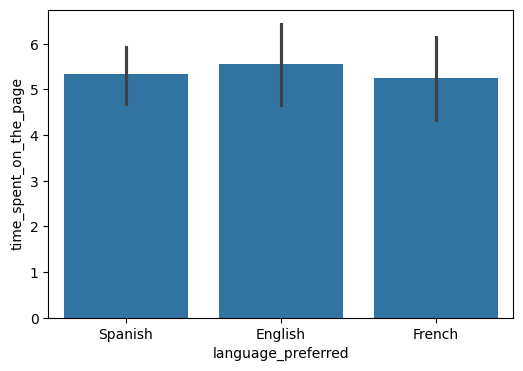

In [12]:
# Relationship between Time Spent on Page and Lanuage Preferred
plt.figure(figsize=(6, 4))
sns.barplot(y = 'time_spent_on_the_page', x = 'language_preferred', data = df)
plt.show()

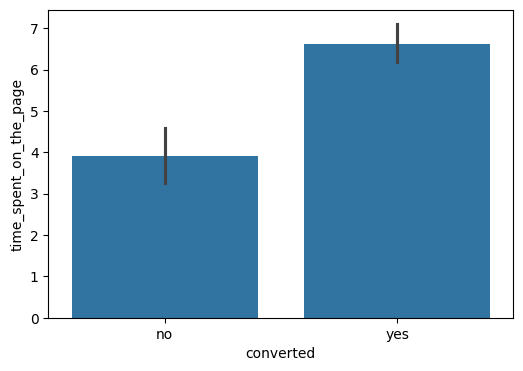

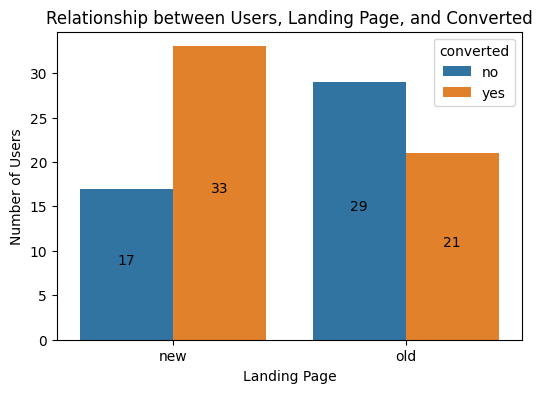

In [34]:
from itertools import count
# Relationship between Time Spent on Page and Converted
plt.figure(figsize=(6, 4))
sns.barplot(y = 'time_spent_on_the_page', x = 'converted', data = df)
plt.show();

# Relationship between users, landing page and Converted
count_df = df.groupby(['landing_page', 'converted']).size().reset_index(name='count')

plt.figure(figsize=(6, 4))

plt.title('Relationship between Users, Landing Page, and Converted')
plt.xlabel('Landing Page')
plt.ylabel('Number of Users')

# stores the plot in a variable.
ax = sns.barplot(y='count', x='landing_page', hue='converted', data=count_df)

# Add labels on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=10, padding=3)

plt.show();

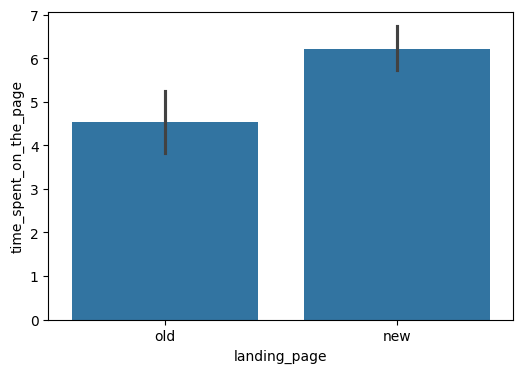

In [35]:
# Relationship between Time Spent on Page and Landing Page
plt.figure(figsize=(6, 4))
sns.barplot(y = 'time_spent_on_the_page', x = 'landing_page', data = df)
plt.show()
#time_spent_on_the_page

## 1. Do the users spend more time on the new landing page than the existing landing page?

Create a pivot table of the data

In [15]:
# Pivot the table
p_df = df.pivot(index=["user_id", "group", "language_preferred"], columns="landing_page", values=["time_spent_on_the_page", "converted"])

# Flatten MultiIndex columns
p_df.columns = [f"{col[0]}_{col[1]}" for col in p_df.columns]
p_df = p_df.reset_index()

# Display the transformed DataFrame
p_df.head()
print(p_df['time_spent_on_the_page_new'].mean())
print(p_df['time_spent_on_the_page_old'].mean())
print('The standard deviation of time spent on the Control page is: ' + str(round(p_df['time_spent_on_the_page_new'].std(),2)))
print('The standard deviation of time spent on the Treatment page is: ' + str(round(p_df['time_spent_on_the_page_old'].std(),2)))


6.2232
4.532400000000001
The standard deviation of time spent on the Control page is: 1.82
The standard deviation of time spent on the Treatment page is: 2.58


It appears that Users spend more time on the new landing page, but we need statistical evidence to prove this.

### Perform Visual Analysis

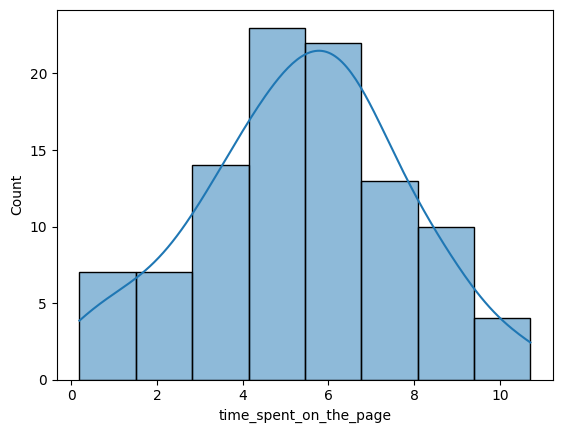

In [ ]:
sns.histplot(data = df,x = 'time_spent_on_the_page' , kde=True)
plt.show();

From the plot above, we can tell that the distribution is approximately normal.

We will further confirm this using the Shapiro Wilk's test

### Step 1: Define the null and alternate hypotheses

### Let's write the null and alternative hypothesis
Let $\mu$ be the mean time spent on the landing page.

Thus, the null hypothesis is;

>$H_0:\mu_{old} = \mu_{new}$   (average time spent on the old and new landing page are equal)

against the alternate hypothesis

>$H_0:\mu_{new} > \mu_{old}$   (the average time spent on the new is greater than the average time spent on the old landing page)

### Step 2: Select Appropriate test

This is a one-tailed test, so We use the Two Independent Sample T-test for Equality of Means - Unequal Std Dev also because we are comparing and testing for two means with equal standard deviation.

Confirming that all assumptions for the use of the above test is met, we first perform the
**Shapiro Wilk's test for normality of the time spent distribution.**

We will test the null hypothesis

>$H_0:$ time spent on landing page follows a normal distribution

against the alternative hypothesis

>$H_a:$ time spent on landing page does not follow a normal distribution

In [10]:
# Assumption 1: Normality using Shapiro Wilk's test
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df['time_spent_on_the_page'])
print('The p-value is', p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis of normal distribution.')
else:
    print('Fail to reject the null hypothesis of normal distribution.')

The p-value is 0.5642956935237358
Fail to reject the null hypothesis of normal distribution.


Since p-value of the test is significantly larger than 0.05 significant level, we fail to reject the null hypothesis that the time spent follows the normal distribution.

Confirming the assumptions of the Paired test are met


*   From Shapiro"s test, we confirmed a normal distribution
*   Continuous data - Yes, the usage time is measured on a continuous scale.
*   Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
*   Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
*   Random sampling from the population - Yes, we are informed that the collected random sample.

**Confirmed! We can use two sample T-test for this problem**.



### Step 3: Decide the significance level

**Significance level is set at 0.05**

### Step 4: Collect and prepare data

In [6]:
# Extract time spent on old and new landing pages
old_time = df[df['landing_page'] == 'old']['time_spent_on_the_page']
new_time = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# check and confirm the mean and variance
print(old_time.mean())
print(new_time.mean())
print('The standard deviation of time spent on the Control page is: ' + str(round(old_time.std(),2)))
print('The standard deviation of time spent on the Treatment page is: ' + str(round(new_time.std(),2)))



4.532400000000001
6.2232
The standard deviation of time spent on the Control page is: 2.58
The standard deviation of time spent on the Treatment page is: 1.82


### Step 5: Calculate the p-value

In [ ]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
'''
Since we are testing if the new_time is greater than the old_time in the alternative hypothesis, we state the new time first otherwise we state the old_time first.
Also because it is a one-tailed test, we state the alternative hypothesis as greater.
'''
test_stat, p_value = ttest_ind(new_time, old_time, equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)


The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# compare p_value with significance level and interprete result
if p_value < 0.05:
    print('Reject the null hypothesis: Users spend significantly more/less time on the new page.')
else:
    print('Fail to reject the null hypothesis: No significant difference in time spent.')

Reject the null hypothesis: Users spend significantly more/less time on the new page.


### Step 7:  Draw inference

**Insight**

As the p-value (0.0001) is less than the level of significance, we reject the null hypothesis. Hence, we have enough evidence to support the claim that suggests users spend more time on the new landing page than the old landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Let's write the null and alternative hypothesis
Let $p_1,p_2$ be the proportions of conversion for old and new landing page respectively.

We test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_2 > p_1$

In [46]:
# use proportion test
# no of converted for old and new
old_convert = len(df[(df['landing_page'] == 'old') & (df['converted'] == 'yes')]['user_id'])
new_convert = len(df[(df['landing_page'] == 'new') & (df['converted'] == 'yes')]['user_id'])
print(f'number of converts for old landing page is:',old_convert)
print(f'number of converts for new landing page is:',new_convert)

# Extract number of converted and non-converted users on the old and new landing pages
total_old_users = len(df[df['landing_page'] == 'old']['converted'])
total_new_users = len(df[df['landing_page'] == 'new']['converted'])
print(f'number of users for old landing page is:',total_old_users)
print(f'number of users for new landing page is:',total_new_users)

# Compute conversion rates
conversion_rate_old = old_convert / total_old_users
conversion_rate_new = new_convert / total_new_users
print(f"Conversion Rate (Old Page): {conversion_rate_old:.4f}")
print(f"Conversion Rate (New Page): {conversion_rate_new:.4f}")


number of converts for old landing page is: 21
number of converts for new landing page is: 33
number of users for old landing page is: 50
number of users for new landing page is: 50
Conversion Rate (Old Page): 0.4200
Conversion Rate (New Page): 0.6600


We see that the conversion rate for the new page is higher than the old page.

However, we need to prove with statistical evidence using the Z-test for proportions.

Also this is a one-tailed test.

### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a user is either converted or not converted.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes, the distribution is approximately normal with the number new converts being greater than 30 for CLT limit and old converts being over 20 thus, approximately meeting the CLT limit. Also, np and n(1-p) are greater than or equal to 10 for both old and new converts.

Therefore, we can use the Z-test.

In [51]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of defective items - start with new before old since alternate hypothesis states that new > old
converted_count = np.array([33, 21])

# set the sample sizes
# recall number of old and new users are 50 each
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(converted_count, nobs, alternative = 'larger')
print('The p-value is ' + str(p_value))
print(f"Z-Statistic: {test_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The new page has a significantly higher conversion rate.")
else:
    print("Fail to reject the null hypothesis: No significant difference in conversion rates.")


The p-value is 0.008026308204056278
Z-Statistic: 2.4077
P-Value: 0.0080
Reject the null hypothesis: The new page has a significantly higher conversion rate.


### Insight

As the p-value is less than the significance level of 0.05, we can reject the null hypothesis because we have enough statistical significance to conclude that the new page has a significantly higher conversion rate.

## 3. Is the conversion and preferred language are independent or related?

For this, we use chi-square test for independence

Let's write the null and alternative hypothesis


We will test the null hypothesis

>$H_0:$ Preferred language is independent of converted.

against the alternate hypothesis

>$H_a:$ Preferred language depends on converted.

**Let's test whether the assumptions for Chi-square test are satisfied or not**

*   Are they Categorical variables? Yes, they are.
*   Are the Expected value of the number of sample observations in each level of the variable at least 5? Yes, the number of observations in each level is greater than 5.
*   Random sampling from the population? Yes, we are informed that the collected sample is a simple random sample.

Therefore, we can use the test!

In [11]:
# use chi2_contingency() function for independence test
# import the required function
from scipy.stats import chi2_contingency

# Create a contingency table using pd.crosstab()
contingency_table = pd.crosstab(df['converted'],df['language_preferred'] )
print(contingency_table.head())

# find the p-value
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('The p-value is', p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis: Preferred language is dependent of conversion.')
else:
    print('Fail to reject the null hypothesis: Preferred language is independent of conversion.')

language_preferred  English  French  Spanish
converted                                   
no                       11      19       16
yes                      21      15       18
The p-value is 0.21298887487543447
Fail to reject the null hypothesis: Preferred language is independent of conversion.


### Insight
As the p-value is greater than the significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that the Preferred language is not independent of conversion at 5% significance level.

## 4. Is the time spent on the new page same for the different language users?

Since we are concerened about only users who visited the new landing page, we use the treatments data frame created earlier for this problem as it is already filtered.

In [16]:
# use ANOVA for 3 sample variables
# get the levels of factor different languages
treatments['language_preferred'].value_counts()

,count
language_preferred,
Spanish,17
French,17
English,16


### Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of preferred languages English, French and Spanish respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one language level is different from the rest.


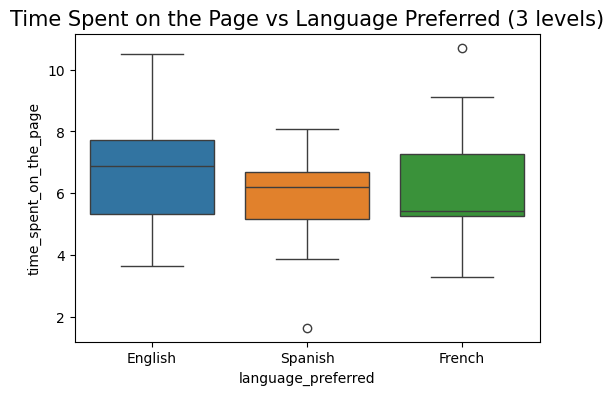

----------------------------------------------------------------------------------------------------
language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


In [15]:
# draw the boxplot for visualization
fig, ax = plt.subplots(figsize = (6,4))
a = sns.boxplot(x= 'language_preferred', y = 'time_spent_on_the_page' , data = treatments, hue = 'language_preferred')
a.set_title("Time Spent on the Page vs Language Preferred (3 levels)", fontsize=15)
plt.show()
print('--'*50)
print(treatments.groupby('language_preferred')['time_spent_on_the_page'].mean())

In [14]:
#Assumption 2: Homogeneity of Variance using The levene() function of Scipy will be used to compute the test statistic and p-value.
#import the required function
from scipy.stats import levene
statistic, p_value = levene( treatments['time_spent_on_the_page'][treatments['language_preferred']=='English'],
                                   treatments['time_spent_on_the_page'][treatments['language_preferred']=='French'],
                                   treatments['time_spent_on_the_page'][treatments['language_preferred']=='Spanish'])
# find the p-value
print('The p-value is', p_value)
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis of homogeneity of variances.')
else:
    print('Fail to reject the null hypothesis of homogeneity of variances.')

The p-value is 0.46711357711340173
Fail to reject the null hypothesis of homogeneity of variances.


Check to see if we meet assumptions

*   Recall, we already did Shapiro Wilks test to confirm the normality of time spent on page data.
*   We also confirmed the homogeneity of variances from Levane's test
*   We confirmed a random sampling

Therefore, we can use the ANOVA Test

In [12]:
# Using the f_oneway() function of Scipy will be used to compute the test statistic and p-value.

#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(treatments.loc[treatments['language_preferred']=='English', 'time_spent_on_the_page'],
                              treatments.loc[treatments['language_preferred']=='French', 'time_spent_on_the_page'],
                              treatments.loc[treatments['language_preferred']=='Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Time spent on the new page is significantly different among language groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in time spent across language groups.")

The p-value is 0.43204138694325955
Fail to reject the null hypothesis: No significant difference in time spent across language groups.


## Conclusion and Business Recommendations

**Insights and Conclusion**

100 samples consisting of users who visited both the new and old landing page were randomly selected and analyzed.

The average time spent on the Control landing page is: 4.53

The average time spent on the Treatment landing page is: 6.22

The standard deviation of time spent on the Control page is: 2.58

The standard deviation of time spent on the Treatment page is: 1.82

The Conversion Rate for the control page (Old Page) is 0.4200 (42%)

The Conversion Rate treatment (New Page) is 0.6600  (66%)

Based on statistical evidences at significant level of 5%, we can conclude the following:

*   There is no significant difference in time spent across language groups on the new landing page.
*   that the Preferred language is not independent of conversion.
*   that the new page has a significantly higher conversion rate than the old page.
*   that users spend more time on the new landing page than the old landing page.

**Recommendation**

The business should give more time for the landing page as it looks promising with respect to the conversion rate.

___